In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras
import pandas as pd
import numpy as np

In [2]:
# Load Data
path = '/Users/las/Documents/GitHub/REU/hill_climb_w_solution_counts.xlsx'
df = pd.read_excel(path)
df = df.drop('Counts', axis=1)

In [3]:
# Prepare Data
data_in = np.array(df[[col for col in df.columns if col[0].islower()]].values.tolist(), dtype=float)
data_out = np.array(df[[col for col in df.columns if col[0].isupper()]].values.tolist(), dtype=float) # - data_in  # betrachte Schritt und nicht das Ziel
n = int(0.9*len(data_in))

train_in = data_in[1:n]
train_out = data_out[1:n]
val_in = data_in[n:]
val_out = data_out[n:]

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, input_dim=(18), activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(18, activation='relu')
])


model.compile(optimizer="Adam", loss=tf.keras.losses.MeanSquaredLogarithmicError(), metrics=["mae"])
model.summary()

2022-09-01 16:50:49.927912: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-01 16:50:49.932819: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              19000     
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_2 (Dense)              (None, 18)                18018     
Total params: 1,038,018
Trainable params: 1,038,018
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(
    x=train_in,
    y=train_out,
    epochs=100,
    batch_size=64,
    shuffle=True,
    validation_data=(val_in, val_out),
    verbose=2,
)

import pickle
keras.models.save_model(model, "model_climb.h5")
np.save('history_climb.npy', history.history)
model = keras.models.load_model("/Users/las/Documents/GitHub/REU/model_climb.h5", compile=False)

Train on 89999 samples, validate on 10000 samples
Epoch 1/100
89999/89999 - 54s - loss: 0.0174 - mae: 0.1457 - val_loss: 0.0165 - val_mae: 0.1382
Epoch 2/100
89999/89999 - 52s - loss: 0.0161 - mae: 0.1402 - val_loss: 0.0159 - val_mae: 0.1433
Epoch 3/100
89999/89999 - 53s - loss: 0.0151 - mae: 0.1363 - val_loss: 0.0142 - val_mae: 0.1312
Epoch 4/100
89999/89999 - 54s - loss: 0.0137 - mae: 0.1307 - val_loss: 0.0124 - val_mae: 0.1255
Epoch 5/100
89999/89999 - 53s - loss: 0.0118 - mae: 0.1228 - val_loss: 0.0105 - val_mae: 0.1169
Epoch 6/100
89999/89999 - 52s - loss: 0.0098 - mae: 0.1136 - val_loss: 0.0085 - val_mae: 0.1069
Epoch 7/100
89999/89999 - 48s - loss: 0.0080 - mae: 0.1042 - val_loss: 0.0069 - val_mae: 0.0985
Epoch 8/100
89999/89999 - 55s - loss: 0.0065 - mae: 0.0956 - val_loss: 0.0056 - val_mae: 0.0904
Epoch 9/100
89999/89999 - 55s - loss: 0.0054 - mae: 0.0882 - val_loss: 0.0046 - val_mae: 0.0834
Epoch 10/100
89999/89999 - 55s - loss: 0.0045 - mae: 0.0819 - val_loss: 0.0038 - val_m

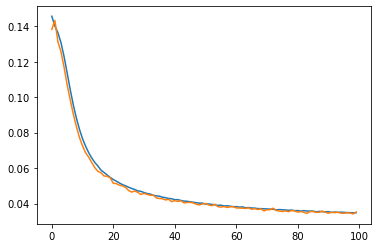

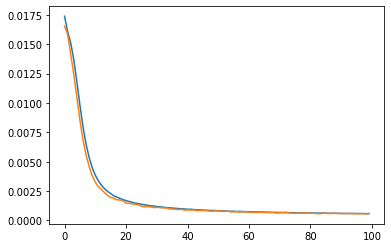

In [7]:
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig = plt.figure()
plt.plot(mae)
plt.plot(val_mae)

fig = plt.figure()
plt.plot(loss)
plt.plot(val_loss)